<a href="https://colab.research.google.com/github/Husayn01/Machine-Learning-Specialization/blob/main/Other%20Notebooks/Spaceship_Titanic_Logistic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
train_data = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Specialization/refs/heads/main/Other%20Notebooks/Data/train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/Husayn01/Machine-Learning-Specialization/refs/heads/main/Other%20Notebooks/Data/test.csv")

In [75]:
print(f"Train shape: {train_data.shape}")
print(f"Test shape: {test_data.shape}")

Train shape: (8693, 14)
Test shape: (4277, 13)


In [76]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [78]:
train_data.nunique()

,0
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


In [79]:
train_data[train_data.select_dtypes(include="float64").columns].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [80]:
px.bar(x=train_data["Transported"].value_counts().index, y=train_data["Transported"].value_counts().values)

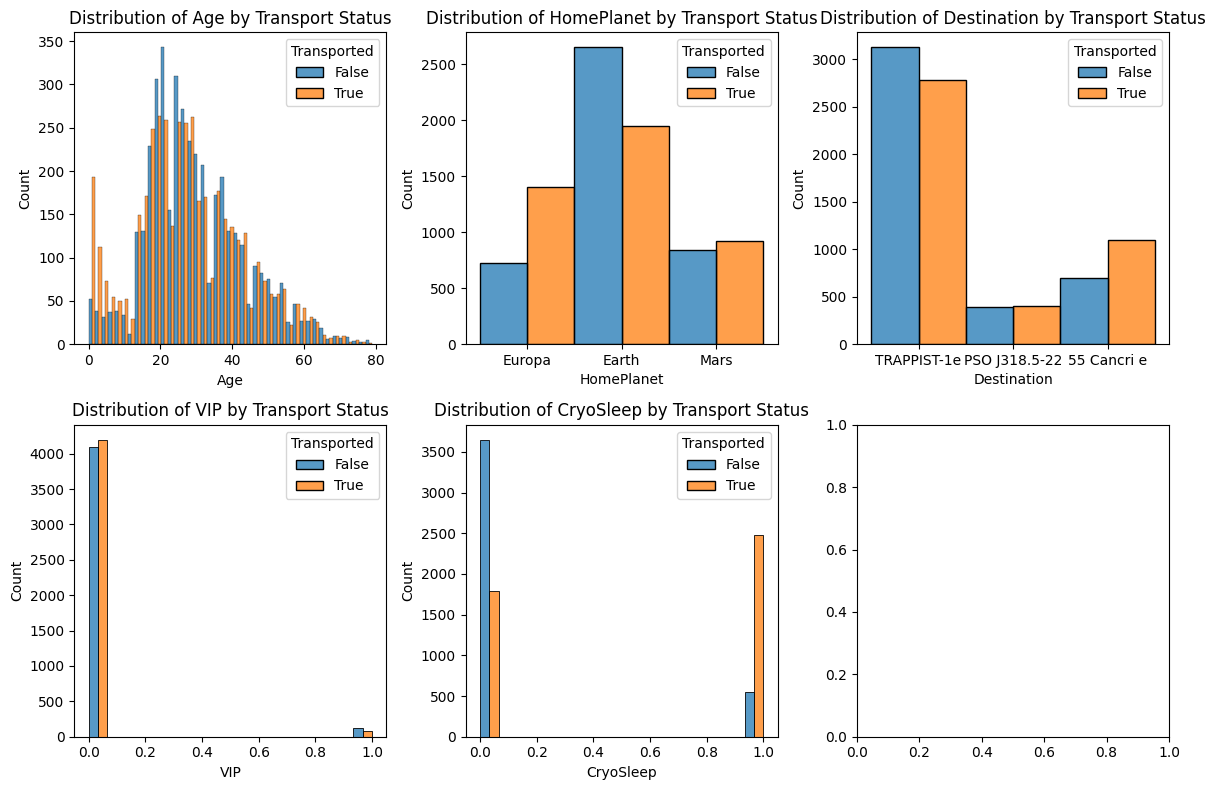

In [81]:
cols = ['Age', 'HomePlanet', 'Destination', 'VIP', 'CryoSleep']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=train_data, x=col, hue='Transported', multiple='dodge', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Transport Status')

plt.tight_layout()
plt.show()


In [82]:
def engineer_features(df):
  df_processed = df.copy()
  if "Cabin" in df_processed.columns:
     df_processed['CabinDeck'] = df_processed['Cabin'].str.split('/').str[0]
     df_processed['CabinNum'] = df_processed['Cabin'].str.split('/').str[1].astype('float')
     df_processed['CabinSide'] = df_processed['Cabin'].str.split('/').str[2]

  df_processed['GroupId'] = df_processed['PassengerId'].str.split('_').str[0]
  df_processed['PassengerNum'] = df_processed['PassengerId'].str.split('_').str[1].astype(int)
  group_sizes = df_processed.groupby('GroupId').size()
  df_processed['GroupSize'] = df_processed['GroupId'].map(group_sizes)

  # Create traveling alone indicator
  df_processed['TravelingAlone'] = (df_processed['GroupSize'] == 1).astype(int)

  # Position within group (could indicate family hierarchy)
  df_processed['GroupPosition'] = df_processed['PassengerNum']

  return df_processed

In [83]:
train_processed = engineer_features(train_data)
test_processed = engineer_features(test_data)
train_processed.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,CabinDeck,CabinNum,CabinSide,GroupId,PassengerNum,GroupSize,TravelingAlone,GroupPosition
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,B,0.0,P,0001,1,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,F,0.0,S,0002,1,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,A,0.0,S,0003,1,2,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,A,0.0,S,0003,2,2,0,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,F,1.0,S,0004,1,1,1,1


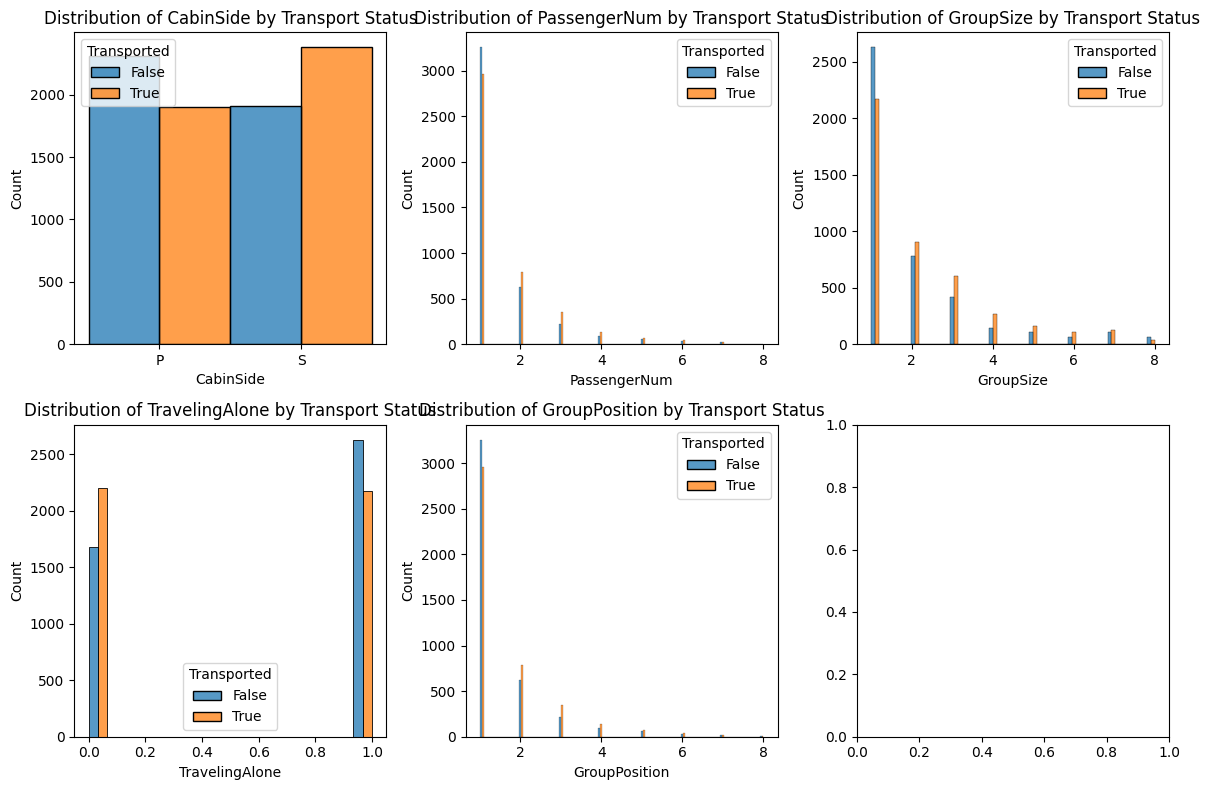

In [84]:
cols = ['CabinSide', 'PassengerNum', 'GroupSize', 'TravelingAlone', 'GroupPosition']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=train_processed, x=col, hue='Transported', multiple='dodge', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Transport Status')

plt.tight_layout()
plt.show()


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [93]:
identifier_cols = ['PassengerId', 'Name', 'Cabin', 'GroupId','Transported']
X = train_processed.drop(identifier_cols, axis=1)
y = train_processed['Transported']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {x_train.shape}")
print(f"Validation set shape: {x_test.shape}")

Training set shape: (6954, 17)
Validation set shape: (1739, 17)
